In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 


In [2]:
df = pd.read_csv('Datasets/breastcancer.csv')
df['diagnosis'].replace(['M','B'],[0,1],inplace=True)

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#X=df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
X=df.iloc[:,2:32]

In [5]:
Y=df[['diagnosis']]

In [6]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Correlation Analysis and Feature Selection

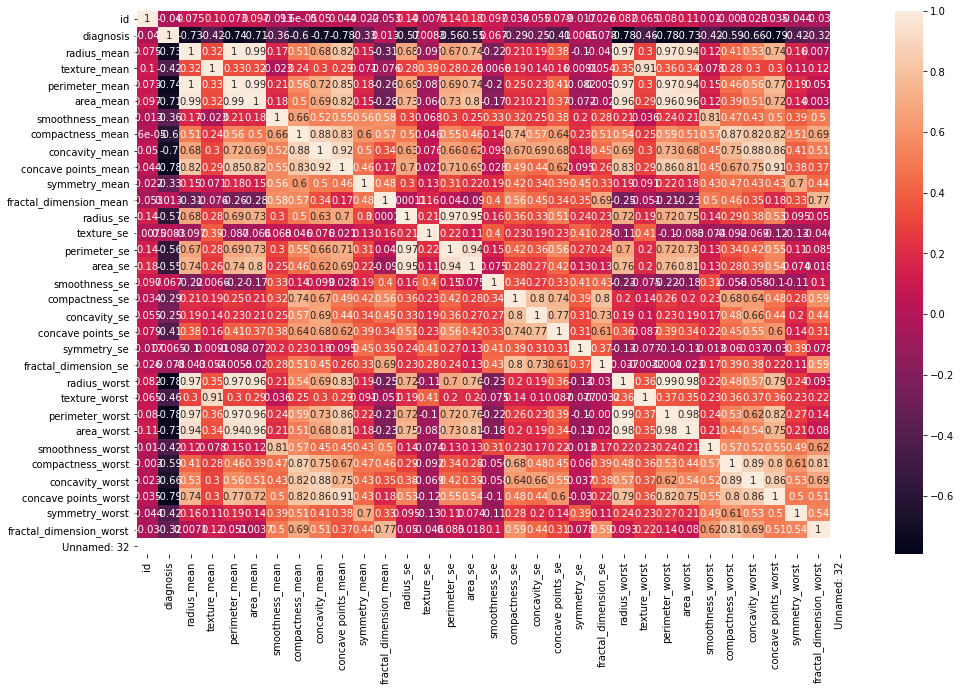

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Classification Models using sklearn 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train)

c:\users\aziz ahmad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [13]:
rf.score(X_train,y_train) 

1.0

In [14]:
y_pred =rf.predict(X_test)

In [15]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Save Model

In [16]:
import joblib 

In [17]:
# Save the model as a pickle in a file 
joblib.dump(rf, 'model.pkl') 

['model.pkl']

In [18]:
# Load the model from the file 
knn_from_joblib = joblib.load('model.pkl')

In [19]:
# Use the loaded model to make predictions 
knn_from_joblib.predict(X_test) 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Deeplearning using ANN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [21]:
# Building the Model
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 30, units = 28, kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 20,kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 20,kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 20,kernel_initializer = "uniform")) 
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "relu", units = 20,kernel_initializer = "uniform"))
classifier.add(Dropout(0.3))
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] ) 


In [22]:
classifier.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                868       
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                580       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                4

In [23]:
history = classifier.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
8/8 [==============================] - 1s 70ms/step - loss: 0.6926 - accuracy: 0.6176 - val_loss: 0.6923 - val_accuracy: 0.5877
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.6374 - val_loss: 0.6913 - val_accuracy: 0.5877
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.6897 - accuracy: 0.6374 - val_loss: 0.6897 - val_accuracy: 0.5877
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6875 - accuracy: 0.6418 - val_loss: 0.6872 - val_accuracy: 0.5877
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.6945 - val_loss: 0.6817 - val_accuracy: 0.7544
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6784 - accuracy: 0.7495 - val_loss: 0.6701 - val_accuracy: 0.9035
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6660 - accuracy: 0.7209 - val_loss: 0.6458 - val_accuracy: 0.6579
Epoch 8/100
8/8 [=======

8/8 [==============================] - 0s 6ms/step - loss: 0.2699 - accuracy: 0.8989 - val_loss: 0.2208 - val_accuracy: 0.8947
Epoch 60/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2550 - accuracy: 0.8967 - val_loss: 0.2009 - val_accuracy: 0.9211
Epoch 61/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2236 - accuracy: 0.9165 - val_loss: 0.1968 - val_accuracy: 0.9474
Epoch 62/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2220 - accuracy: 0.9143 - val_loss: 0.2119 - val_accuracy: 0.8947
Epoch 63/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2293 - accuracy: 0.9077 - val_loss: 0.2154 - val_accuracy: 0.9035
Epoch 64/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2396 - accuracy: 0.8967 - val_loss: 0.2000 - val_accuracy: 0.9211
Epoch 65/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2456 - accuracy: 0.9011 - val_loss: 0.2011 - val_accuracy: 0.8947
Epoch 66/100
8/8 [==============

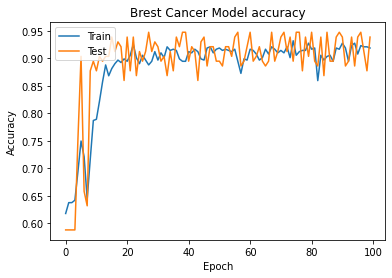

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Brest Cancer Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
#Performing prediction and rescaling
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5) 


In [26]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred) 
cm 


array([[42,  5],
       [ 2, 65]], dtype=int64)

In [27]:
#Accuracy
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 

93.85964912280701
